In [3]:
import cv2
import numpy as np

### 마우스 이용 관심 영역 추출
+ 관심 영역(Region of Interest, ROI)
<br> : Frame(이미지)상에, 연산 및 분석의 대상이되는 특정부분을 관심 영역(Region of Interest, ROI)이라고 합니다. 그리고, 대상 Frame 에서, ROI 를 추출하는 작업을 Image Crop 이라고 합니다.<br><br>

In [11]:
img = cv2.imread('img/sunset.jpg')             # 대상 이미지 불러오기

In [12]:
x,y,w,h = cv2.selectROI('img',img,False,False)       # 대상 이미지의 원하는 부분을 드래그하여 선택, Enter 통해 최종 ROI 추출


# cv2.selectROI
#  => window (str) : 대상 이미지를 출력할 Window 이름
#  => img (numpy.ndarray) : 읽어들인 대상 이미지
#  => showCrossHair (bool) : 드래그하여 선택된 영역의 중심에 십자가를 표현할 것인지 결정
#  => fromCenter (bool) : 드래그의 시작지점을 ROI 의 중심으로 간주할 것인가를 나타냄
#  => return
#     -> x,y : ROI 의 좌측 상단 x,y 좌표
#     -> w,h : ROI 의 width, height

if w and h:                                    # 추출된 영역이 직사각형 형태인지 확인
    roi = img[y:y+h,x:x+w]                     # 대상 Image에서, ROI 영역 계산
    cv2.imshow('cropped',roi)                  
    cv2.moveWindow('cropped',0,0)
    cv2.imwrite('img/cropped1.jpg',roi)        # ROI 이미지로 저장
    
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 컬러 스페이스에 대해 알아봅시다.
+ 컬러 스페이스 (Color Space)
<br> : 컬러 이미지의 경우, 3 개의 (0~255)의 Channel 값을 조합하여, Image 내 하나의 픽셀을 표현. 이때, 각 Channel(1 Byte 크기) 값이 의미하는 원색은 컬러 스페이스가 지정하는 바에 따라 달라짐
<br><br>
+ 컬러 스페이스의 종류
  + RGB (Red, Green, Blue)<br>: 빛의 3원소인 Red, Green, Blue 를 조합하여, 다양한 색을 표현. 즉, 하나의 색(픽셀)이 3 개의 원색으로 표현되기에, 픽셀 하나는 일반적으로 Red, Green, Blue 3 개의 Channel 로 구성됨.<br>
    + opencv 라이브러리 사용하여 이미지를 읽어들인 경우, 첫번째 채널 값이 Blue, 두번째 값이 Green, 세번째 값이 R 에 해당함<br><br>
  + HSV (Hue,Saturation,Value)<br>: 색조(Hue), 채도(Saturation), 명도(Value) 의 3개의 채널로 픽셀값을 표현하는 컬러 스페이스. 
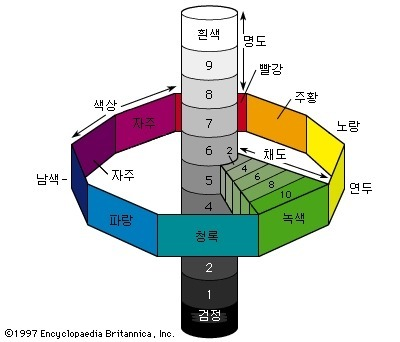
  + YUV (Luma, Chroma Blue, Chroma Red)<br>: 밝기를 나타내는 휘도(Luma), 밝기를 제외한 색상정보를 나타내는 색차 정보(Chroma Blue, Chroma Red)의 3 Channel 들로 Pixel 을 표현하며, 티비나 비디오 카메라에서 많이 사용하는 방식. 동시에 사람의 눈이 색상 신호(U,V)보다 밝기 신호(Y)에 더 민감하다는 점을 고려하여 만든 색 공간임. 

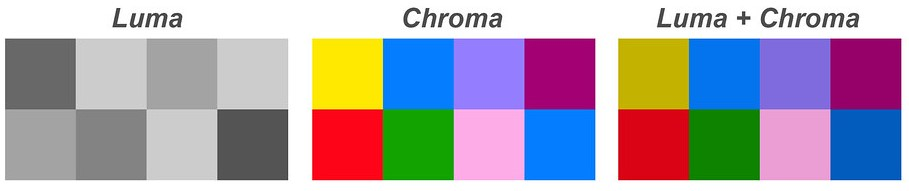

#### RGB 컬러 스페이스에 대해 알아봅시다.
+ Red, Green, Blue 3가지의 채널만 사용 (RGB, BGR)
+ Red, Green, Blue, Alpha 4가지의 채널 사용 (RGBA)
 + 추가된 Alpha 채널은, 배경의 투명도(색에 대한 원소가 추가된 것 아님)를 나타내기 위한 값으로, 0 은 완전 투명, 255 는, 완전 불투명을 의미 

In [13]:
img = cv2.imread('img/opencv_logo.png')                       # 기본값 (cv2.IMREAD_COLOR) 로 읽기
bgr = cv2.imread('img/opencv_logo.png',cv2.IMREAD_COLOR)      # bgr 로 읽기
bgra = cv2.imread('img/opencv_logo.png',cv2.IMREAD_UNCHANGED) # bgra 로 읽기

In [14]:
print(f'default: {img.shape}, color: {bgr.shape}, unchanged: {bgra.shape}') # bgra 로 읽은 경우, 아래와 같이, 채널이 한개 더 추가된 것을 알 수 있음

default: (120, 98, 3), color: (120, 98, 3), unchanged: (120, 98, 4)


In [15]:
cv2.imshow('bgr',bgr)                         
cv2.imshow('bgra',bgra)                       
cv2.imshow('alpha', bgra[:,:,3])              # 마지막 채널값(Alpha)만 읽어들임

cv2.moveWindow('bgr', 50,200)
cv2.moveWindow('bgra', 200,200)
cv2.moveWindow('alpha', 350,200)

cv2.waitKey(0)
cv2.destroyAllWindows()

##### 위의 결과를 바탕으로, 다음에 답합니다.
+ `cv2.IMREAD_UNCHANGED` 로 읽어들인 이미지에서 마지막 채널값만을 이용하여 이미지를 표현할 때, Binary 이미지 처럼(추후에 설명), 아래와 같이 흑과 백으로만 표현되는 이유가 무엇인가요?<br>: 보통, Alpha 채널은, 배경의 투명도를 나타내기 위해 사용됩니다. 0은 완전 투명(다른 이미지 위에, 배경이 투명한 이미지를 올리면, 뒷 이미지가 그대로 투영됩니다.), 255 은 완전 불투명(뒷 이미지가 보이지 않고, 앞에 있는 이미지만 보입니다.)을 의미합니다. 이때, 해당 Alpha 값만을 추출하여, 이미지를 표현하는 경우, 이는 값이 0 혹은 255인, Channel 1개로만 표현된 Binary 이미지와 같아집니다. 따라서, 투명한 배경은, 채널 값이 0 이므로, 검은색, 완전 불투명한 배경은 255 이므로 하얀색으로 표현되는 것입니다. 
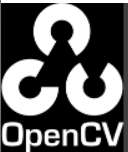

#### Greyscale 에 대해 알아봅시다.
+ Greyscale<br>: 이미지의 한개의 Pixel 값을 0 ~ 255 범위 내의 수 1개(따라서, Channel 수는 1)로 표현. 이에 따라, 이미지의 명암만을 표현할 수 있음.
  + 주어진 Colored Scale 이미지의 3개의 채널값의 평균(단순히, 명암 정보만을 표현하고자 하기에, 3 채널값들의 평균 수치만을 이용해도 적당)이 Grey Scale 로 변환된 Pixel 값을 의미

In [16]:
img = cv2.imread('img/girl.jpg')  # 먼저, Image 를 Color Scale 로 읽어들입니다. 
img2 = img.astype(np.uint16)      # 1 Byte 값 3개에 대한 덧셈 결과가, 1 Byte 를 초과할 수 있으므로, 2 Byte 로 임시 Type 변환 

# ndarray.astype
#  => dtype : 해당 함수를 호출한 ndarray 의 모든 원소의 타입을 dtype 인자값으로 변경

In [17]:
b,g,r = cv2.split(img2)                       # 이미지를 채널 별로 분리,Colored Scale 로 읽었으므로, 총 3개의 채널(ndarray)로 분리
gray = ((b+g+r)/3).astype(np.uint8)           # 방법 1 - 3개의 채널 값의 평균을 구함. Grey Scale 변환 완료

# cv2.split
#  => image : 채널 별로 분리될 원본 이미지 (ndarray) 

gray2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  # 방법 2 - cv2.cvtColor 함수 사용 

# cv2.cvtColor
#  => image : Color Scale 변환할 이미지
#  => flag : ~ Scale 에서, ~ Scale 로 변환할 것인지 지정

cv2.imshow('original',img)
cv2.imshow('gray1_manual',gray)
cv2.imshow('gray1_func',gray2)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### HSV 컬러 스페이스에 대해 알아봅시다.
+ 색조(Hue)<br>: 픽셀의 색상을 의미하는 Channel 값으로, 아래의 원과 같은 색조표에서, 165 ~ 185 도, 0 ~ 15 도 의 영역은 Red 를, 45 ~ 75 도는 Green을, 90~120 도는 Blue을 의미<br><br>
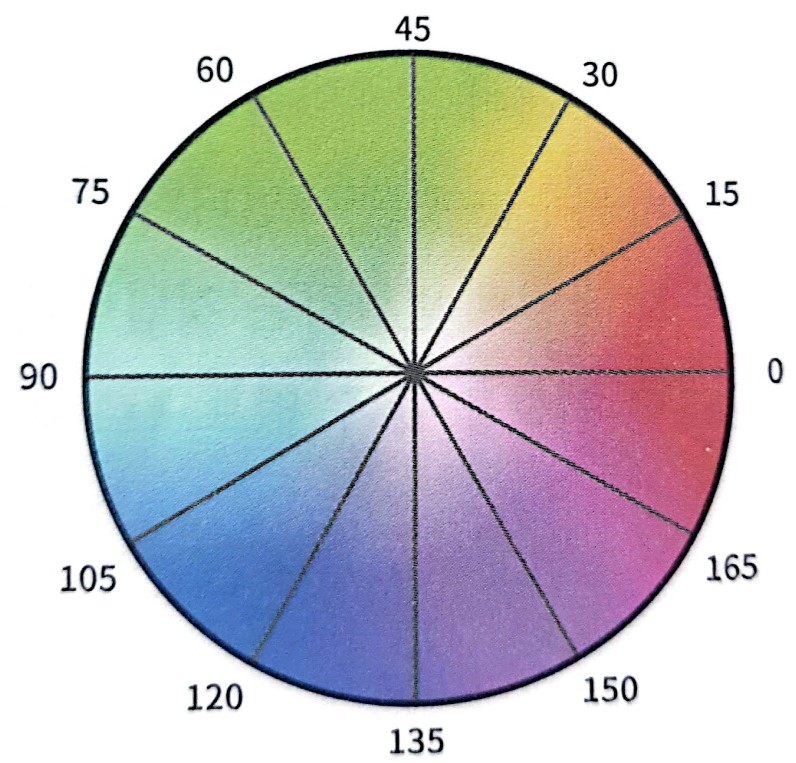<br><br>
+ 채도/순도 (Saturation)<br>: 색상(Hue)값이 고정되어있다고 가정할 때, 주어진 색상값의 순도(맑고, 탁한 정도로, 해당 색상이 얼마나 순수하게 포함되어있는가?)를 나타냄 (주어진 색상에서, 0 은 가장 탁한 색상을, 255 는 가장 순수한 색상을 나타냄)<br><br>
+ 명도(Value)<br>: 색상의 밝기(어두움,밝음)을 나타냄. 여기서, 0 은 가장 어두운 상태로 검은색에 가깝고, 255 는 가장 밝은 상태로 하얀색에 가까움,

In [18]:
red_bgr = np.array([[[0,0,255]]],dtype=np.uint8)         # 순수한 가장 밝은 Red
green_bgr = np.array([[[0,255,0]]],dtype=np.uint8)       # 순수한 가장 밝은 Green
blue_bgr = np.array([[[255,0,0,]]],dtype=np.uint8)       # 순수한 가장 밝은 Blue

yellow_bgr = np.array([[[0,255,255]]], dtype=np.uint8)   # 순수한 가장 밝은 Yellow (Red + Greem)

In [19]:
## 각각의 4가지 색의 Color Space 를 HSV 로 변환
red_hsv = cv2.cvtColor(red_bgr, cv2.COLOR_BGR2HSV)       
green_hsv =cv2.cvtColor(green_bgr,cv2.COLOR_BGR2HSV)
blue_hsv =cv2.cvtColor(blue_bgr,cv2.COLOR_BGR2HSV)
yellow_hsv =cv2.cvtColor(yellow_bgr,cv2.COLOR_BGR2HSV)

print(f'red(H,S,V): {red_hsv}')
print(f'green(H,S,V): {green_hsv}')
print(f'blue(H,S,V): {blue_hsv}')
print(f'yellow(H,S,V): {yellow_hsv}')

red(H,S,V): [[[  0 255 255]]]
green(H,S,V): [[[ 60 255 255]]]
blue(H,S,V): [[[120 255 255]]]
yellow(H,S,V): [[[ 30 255 255]]]


#### YUV 컬러 스페이스에 대해 알아봅시다.
+ 밝기 (Luma)<br>: Pixel의 명암 정보
+ 밝기와 Blue 와의 색상차 (Chroma Blue)<br>: Blue 성분에서 밝기값을 뺀것 
+ 밝기와 Red 와의 색상차 (Chroma Red)<br>: Red 성분에서 밝기값을 뺀것

+ 기존 RGB 컬러 스페이스에서의 3 개의 Channel 들의 값을 각각 R, G, B 라고 할 때, 해당 이미지의 YUV (YCbCr) 공간에서의 3 개의 Channel(Y,Cb,Cr)의 값들은 아래의 공식을 통해 유도(아래 식의 $K_R, K_G, K_B$ 값은 사전에 약속된 조합이 존재, 단, 반드시 $K_R + K_G + K_B = 1$ 이어야 함!)<br>
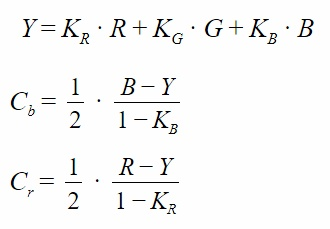

In [20]:
dark = np.array([[[0,0,0]]], dtype=np.uint8)              # 3 Channel 모두 어두운 밝기(검정색) 0 을 가지고 있음
middle1 = np.array([[[127,127,127]]],dtype=np.uint8)      # 3 Channel 모두 중간 밝기 127 을 가지고 있음
middle2 = np.array([[[120,124,122]]],dtype=np.uint8)
bright = np.array([[[255,255,255]]],dtype=np.uint8)       # 3 Channel 모두 최대 밝기(하얀색) 255 을 가지고 있음

dark_yuv = cv2.cvtColor(dark,cv2.COLOR_BGR2YUV)
middle1_yuv = cv2.cvtColor(middle1,cv2.COLOR_BGR2YUV)
middle2_yuv = cv2.cvtColor(middle2,cv2.COLOR_BGR2YUV)
bright_yuv = cv2.cvtColor(bright,cv2.COLOR_BGR2YUV)

In [21]:
print(f'dark(Y,U,V): {dark_yuv}')
print(f'middle1_yuv(Y,U,V): {middle1_yuv}')
print(f'middle2_yuv(Y,U,V): {middle2_yuv}')
print(f'bright_yuv(Y,U,V): {bright_yuv}')

dark(Y,U,V): [[[  0 128 128]]]
middle1_yuv(Y,U,V): [[[127 128 128]]]
middle2_yuv(Y,U,V): [[[123 127 127]]]
bright_yuv(Y,U,V): [[[255 128 128]]]


### 스레시홀딩에 대해 알아봅시다.
+ 스레시홀딩 (Threshholding)<br>: 특정 임계값(=스레시홀드)을 경계로 Channel 의 상태를 2개로 분류하는 방법으로, 대표적인 바이너리 이미지 생성 기법
  + 바이너리 (Binary) 이미지<br>: 이미지의 Channel(Channel 개수 1개!)이 가질 수 있는 값이 2개(보통,  0 과 255)만 존재함. 따라서, 모든 Pixel 은, 검정색, 아니면 하얀색만을 표현
+ 3 가지 대표적 스레시홀딩 기법
  + 전역 스레시홀딩 (Simple Thresholding)
  + 적응형 스레시홀딩 (Adaptive Thresholding)
  + 오츠의 알고리즘 (Otsu's Algorithm)

#### 전역 스레시홀딩에 대해 알아봅시다.
+ 스레시홀드 값으로 127 설정

In [4]:
import matplotlib.pylab as plt

img = cv2.imread('img/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE)

## Numpy 사용하여, 127 보다 큰 Channel 값을 255 로, 127 미만의 Channel 값을 0 로 변경
thresh_np = np.zeros_like(img)
thresh_np[img > 127] = 255           

## np.zeros_like
##  => array_like (ndarray) : Shape 을 모방(값은 모두 0으로 채워짐)할 ndarray   

## cv 를 사용하여, 127 기준의 스레시홀딩
ret, t_bin = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

## 여러 종류의 type_flag 값
ret, t_bininv = cv2.threshold(img, 127,255, cv2.THRESH_BINARY_INV)
ret, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, t_2zr = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)

## cv2.threshold
##  => image : Binary 이미지로 변환할 원본 이미지 (ndarray)
##  => thresh : 임계값
##  => max : 임계값보다 큰 값을 갖는 Channel 에 적용할 값
##  => flag -> cv2.THRESH_BINARY (pixel_val > thresh ? max : 0) 
##          -> cv2.THRESH_BINARY (pixel_val > thresh ? 0 : max)  
##          -> cv2.THRESH_TRUNC (pixel_val > thresh ? thresh : pixel_val)
##  => return -> thresh : 인자로 전달한 임계값
##            -> thresh_img : 스레시홀딩에 의해 변환된 결과 이미지 (ndarray)

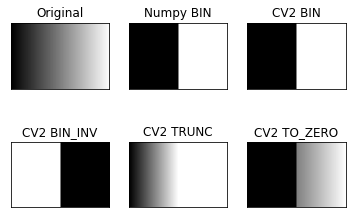

In [23]:
imgs = {'Original' : img, 'Numpy BIN' : thresh_np, 'CV2 BIN':t_bin, 'CV2 BIN_INV':t_bininv, 'CV2 TRUNC':t_truc, 'CV2 TO_ZERO': t_2zr}

for i, (key,value) in enumerate(imgs.items()):
    plt.subplot(2,3,i+1)
    plt.title(key)
    plt.imshow(value,cmap='gray')
    plt.xticks([]); plt.yticks([])
plt.show()

#### 오츠의 알고리즘에 대해 알아봅시다.
+ 오츠의 알고리즘<br>: Binary 이미지 변환을 위해, 가능한 모든 스레시홀드 값들에 대해, 이미지의 픽셀을 2개의 class 로 분류하고, 그중, 각 class 내의 분산을 최소화(= Class 간 분산 최대화)하는 스레시홀드 값(최적)을 찾는 방법
  + 좋은 바이너리 이미지 (Pixel 이 2개의 Class 로 분류)는, 어떤 임계값을 기준으로 분류된 각각의 Class 내부 분산 (Intra-Class Variance)이 작음과 동시에, Class 간 분산 (Inter-Class Variance)은 크다는 특징이 있음
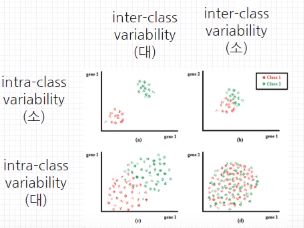
    + 클래스 내 분산<br>: 각 데이터가 속한 클래스 내에서의 평균적인 분산값으로,어떤 스레시홀드 $t$ 를 기준으로 데이터들을 2개의 Class 로 분류했을 때, 클래스 내 분산 $\sigma^2_{intra}$ 은 다음 공식을 통해 유도 가능 
      * $w_0$ 와 $w_1$ 를 다음과 같이 정의
        1. $w_0(t) = \sum_{i=1}^t p(i) =$ 임의의 데이터 하나가 Class 0 에 속할 확률
        2. $w_1(t) = \sum_{i=t+1}^L p(i) =$ 임의의 데이터 하나가 Class 1 에 속할 확률
        3. $\therefore, w_0(t) + w_1(t) = 1$<br><br>
      * Class 0에서의 표본 평균 $\mu_{0}$ 과, Class 1 에서의 표본 평균  $\mu_{1}$ 을 다음과 같이 정의 
        1. $\mu_{0}(t) = \sum_{i=1}^t i*\frac{p(i)}{w_0(t)}$
        2. $\mu_{1}(t) = \sum_{i=t+1}^L i*\frac{p(i)}{w_1(t)}$
        3. $\therefore, \mu_{0}(t) * w_0(t) + \mu_{1}(t)* w_1(t) = \sum_{i=1}^t i*p(i) + \sum_{i=t+1}^L i*p(i) = \sum_{i=1}^L i*p(i) = \mu_{total}$<br><br>
      * Class 0 에서의 표본 분산 $\sigma^2_{0}(t)$ 과, Class 1 에서의 표본 분산 $\sigma^2_{1}(t)$ 을 다음과 같이 정의
        1. $\sigma^2_{0}(t) = \sum_{i=1}^t (i-\mu_{0}(t))*\frac{p(i)}{w_0(t)}$
        2. $\sigma^2_{1}(t) = \sum_{i=t+1}^L (i-\mu_{1}(t))*\frac{p(i)}{w_1(t)}$<br><br>
      * 그렇다면, 임의의 데이터를 하나 뽑았을 때, 해당 데이터가 속한 Class 에서의 분산(Intra-Class Variance)의 평균 수치($\sigma^2_{intra}$)는 다음과 같이 유도 가능 
      $$\sigma^2_{intra} = w_0(t)\sigma^2_{0}(t) + w_1(t)\sigma^2_{1}(t)$$
    + 클래스 간 분산<br>:
+ 정리하자면, 오츠의 알고리즘은, 원본 이미지의 히스토그램 분포가 Bimodal 형태(두개의 Class 가, Class 내부 분산은 작음과 동시에, Class 간 분산은 큰 형태로 분포)일 때를 전제로 하여 스레시홀드 값을 구하기에, Bimodal Image에서 가장 높은 정확도(알고리즘이 반환한 스레시 홀드 값이 실제 최적의 스레시홀드 값)를 보임.

In [38]:
img = cv2.imread('img/scaned_paper.jpg',cv2.IMREAD_GRAYSCALE)

## 전역 스레시홀딩 (스레시홀드 값으로 130 설정)
_,t_130 = cv2.threshold(img,130,255,cv2.THRESH_BINARY)

## flag 값에 cv2.THRESH_OTSU 전달하여, 자동으로 최적 전역 스레시홀드 값을 찾도록 함
##   => 이때, 임계값에 대한 인자 thresh 에 전달되는 값은 무시됨
t,t_otsu = cv2.threshold(img,-1,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('otsu threshold: ',t)

otsu threshold:  131.0


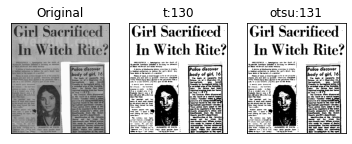

In [33]:
imgs = {'Original' : img, 't:130' : t_130, 'otsu:%d'%t : t_otsu}
        
for i, (key,value) in enumerate(imgs.items()):
    plt.subplot(1,3,i+1)
    plt.title(key)
    plt.imshow(value,cmap='gray')
    plt.xticks([]); plt.yticks([])
plt.show()

#### 적응형 스레시홀딩에 대해 알아봅시다.
+ 적응형 스레시홀딩 (Adaptive Threshholding)<br>: Image의 부분마다 광원 조건이 다른 경우, 주변 픽셀값들을 고려하여 각 픽셀마다 고유의 스레시홀드 값을 모두 구하고, 해당 스레시홀드 값들을 이용하여 스레시홀딩 진행
+ 스레시홀드 값 결정 알고리즘
  + 산술 평균 (cv2.ADAPTIVE_THRESH_MEAN_C)
  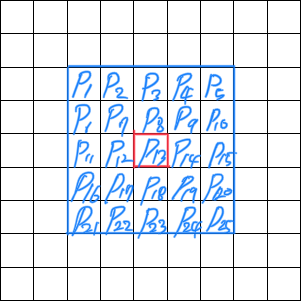
    1. 위와 같이, $9*9$ 크기의 이미지가 있다고 가정
    2. Block Size 를 통해 Window Size 를 결정. Block Size 를 $N$ 이라고 할 때, Window Size 는 $N*N$ 임. 위의 예시에서는, BLock Size = 5 이므로, Window Size = $5*5$ 임
    3. 이미지의 가장자리의 픽셀들에 대해서도 스레시홀드 값을 구해야하므로, Window Size 에 맞게, Image 주변에 Zero Padding 을 추가함. 여기선, 폭이 2 인 Zero Padding 을 추가
    4. 예시 상에서, P13 픽셀 에 대해 스레시홀드 값을 구하고자 하는 경우, P13 픽셀을 중심으로, $5*5$ 크기의 Window 를 적용  
    5. 이후, Window 의 P1 ~ P25 픽셀 값들의 평균을 구함.
    6. 5의 값에 가감값 C 를 뺌
    7. P13 의 픽셀 값이 6 의 결과물보다 큰지 확인 $(예:\ P13 =\ if(P13 > T)\ 255\ else \ 0)$
    8. 4 ~ 7 의 과정을 $9*9$ 개의 모든 픽셀들에 대해 실시 
    

In [10]:
blk_size = 9                ## Block Size = 9, 따라서, 9 x 9 가 Window 크기가 됨
C = 5                       ## 각 Window 에서 계산된 평균에서 5가 차감됨
img = cv2.imread('img/sudoku.png',cv2.IMREAD_GRAYSCALE)

## Otsu 의 알고리즘 사용하여, Threshold 찾기
ret,th1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

## 각 Window 내 픽셀들의 산술평균을 구함  
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,blk_size,C)
## 각 Window 내 픽셀들의 가우시안 분포에 따른 가중치의 합을 구함
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,blk_size,C)

## cv2.adaptiveThreshold
##  => img : 적응형 스레시홀딩을 사용하여, 이진화시킬 대상 Image (ndarray)
##  => val : 임계값보다 큰 값을 갖는 Channel 에 적용할 값
##  => method : 적응형 스레시홀딩 기법의 상세 알고리즘 결정
##            -> cv2.ADAPTIVE_THRESH_MEAN_C
##            -> cv2.ADAPTIVE_THRESH_GAUSSIAN_C
##  => block_size : (중심점이 존재할 수 있게 홀수만 가능)
##  => C : 최종적으로 스리시홀드 값에 가감될 상수

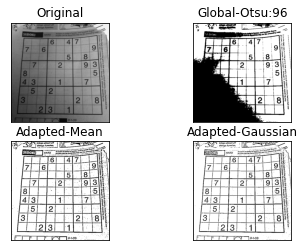

In [11]:
imgs = {'Original' : img, 'Global-Otsu:%d'%ret : th1, 'Adapted-Mean':th2, 'Adapted-Gaussian' : th3}
        
for i, (k,v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]); plt.yticks([])
plt.show()